# Ejercicio 1: Implementación del Modelo de Cascada Independiente

En este ejercicio, implementarás las componentes clave para simular un modelo de cascada independiente utilizando la clase `Simulation` que se te proporciona. El objetivo es modelar cómo se propaga una "infección" (o un rumor, una idea, etc.) a través de una red.

Deberás definir tres funciones en Python:

1.  **`estado_inicial_cascada(G: nx.Graph) -> dict`**:
    *   Esta función toma un grafo `G` como entrada.
    *   Debe devolver un diccionario donde las claves son los nodos del grafo y los valores representan el estado de cada nodo.
    *   Inicialmente, todos los nodos deben estar en estado `"sano"`.
    *   Luego, se elige **un único nodo al azar** del grafo y su estado se cambia a `"infectado"`.

2.  **`transicion_estado_cascada(G: nx.Graph, estado_actual: dict) -> dict`**:
    *   Esta función toma el grafo `G` y el diccionario `estado_actual` de los nodos.
    *   Define cómo cambian los estados en cada paso de la simulación:
        *   Los nodos que ya están en estado `"infectado"` permanecen `"infectado"`.
        *   Para cada nodo `v` que actualmente está `"sano"`:
            *   Considera a cada uno de sus vecinos `u` que está `"infectado"` en el `estado_actual`.
            *   El vecino `u` (infectado) tiene una probabilidad \( p_{uv} = \frac{1.0}{\text{grado}(u)} \) de infectar al nodo `v` (sano) en este paso. El grado de `u`, denotado como \(\text{grado}(u)\), es el número de vecinos que tiene `u`.
            *   Si al menos uno de los vecinos infectados de `v` logra transmitir la infección (según su respectiva probabilidad), el estado de `v` cambiará a `"infectado"`.
    *   La función debe devolver un diccionario que contenga **únicamente** los nodos cuyo estado ha cambiado en este paso y su nuevo estado. Por ejemplo, si el nodo `X` cambió de `"sano"` a `"infectado"`, el diccionario devuelto sería `{'X': "infectado"}`. Si ningún nodo cambia de estado, devuelve un diccionario vacío.

3.  **`condicion_parada_cascada(G: nx.Graph, estado_actual: dict) -> bool`**:
    *   Esta función toma el grafo `G` y el `estado_actual` de los nodos.
    *   Debe devolver `True` si la simulación debe detenerse, y `False` en caso contrario.
    *   La simulación se detendrá si todos los nodos en el grafo han alcanzado el mismo estado (es decir, todos están `"sano"` o todos están `"infectado"`).

Observación: La probabilidad de activación \( p_{uv} = \frac{1.0}{\text{grado}(u)} \) significa que los nodos infectados con menos vecinos (menor grado) son más influyentes o efectivos al intentar infectar a un vecino específico, ya que su "esfuerzo" de propagación se divide entre menos contactos.

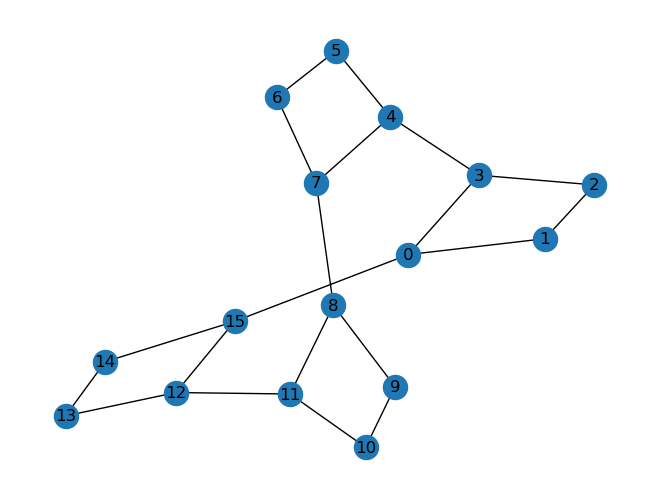

Stop condition met at step 12.


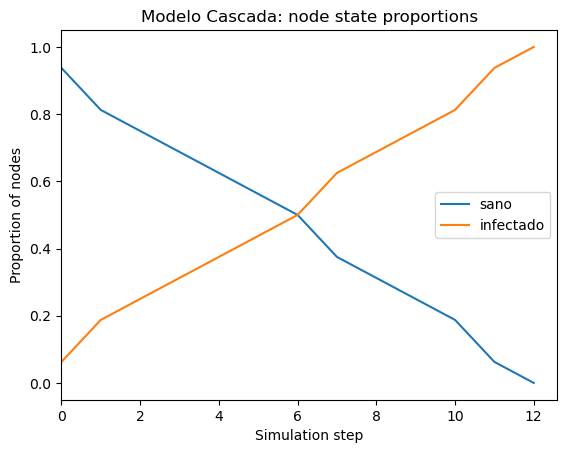

In [1]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
from simulation import Simulation 

def estado_inicial_cascada_solucion(G: nx.Graph) -> dict:
    # your code here
    """
    Estado inicial: todos 'sano' excepto un nodo elegido al azar que parte 'infectado'.
    """
    # Inicialmente todos sanos
    estado = {nodo: "sano" for nodo in G.nodes()}
    
    # Elegir un nodo al azar y marcarlo como infectado
    if len(estado) > 0:
        nodo_inicial = random.choice(list(G.nodes()))
        estado[nodo_inicial] = "infectado"
    
    return estado

def transicion_estado_cascada_solucion(G: nx.Graph, estado_actual: dict) -> dict:
    # your code here
    """
    Un paso de la cascada:
    - Infectados permanecen infectados.
    - Cada sano puede ser infectado por vecinos infectados con prob p_uv = 1 / grado(u).
    - Devuelve SOLO los nodos cuyo estado cambia en este paso.
    """
    cambios = {}

    # Recorremos los nodos que están sanos actualmente
    for v, estado_v in estado_actual.items():
        if estado_v != "sano":
            continue  # sólo evaluamos posibles nuevas infecciones

        vecinos = G.neighbors(v)
        infectar_v = False

        # Revisar vecinos infectados
        for u in vecinos:
            if estado_actual.get(u) == "infectado":
                grado_u = G.degree[u]
                if grado_u <= 0:
                    continue  # por seguridad, aunque en general no habrá grado 0 si tiene vecino
                p_uv = 1.0 / grado_u

                # Lanzamos el "dado" de infección
                if random.random() < p_uv:
                    infectar_v = True
                    break  # con que un vecino lo infecte, basta

        if infectar_v:
            cambios[v] = "infectado"

    return cambios

def condicion_parada_cascada_solucion(G: nx.Graph, estado_actual: dict) -> bool:
    # your code here
    """
    La simulación se detiene si TODOS los nodos están en el mismo estado
    (todos 'sano' o todos 'infectado').
    """
    estados_distintos = set(estado_actual.values())
    return len(estados_distintos) == 1

g_simple_infection = nx.Graph()
g_simple_infection.add_edge('A', 'B') # A: degree 1, B: degree 1
current_state_simple = {'A': "infectado", 'B': "sano"}
random.seed(10) # random.random() será < 1.0 (probabilidad de A->B es 1/1=1)
changes = transicion_estado_cascada_solucion(g_simple_infection, current_state_simple)
assert changes.get('B') == "infectado", "El nodo B debería infectarse."
assert len(changes) == 1, "Solo el nodo B debería cambiar de estado."

G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
nx.add_cycle(G, [8, 9, 10, 11])
nx.add_cycle(G, [12, 13, 14, 15])
G.add_edge(3, 4)
G.add_edge(8, 7)
G.add_edge(11, 12)
G.add_edge(15, 0)

nx.draw(G, with_labels=True)
plt.show()
sim = Simulation(G, estado_inicial_cascada_solucion, transicion_estado_cascada_solucion, condicion_parada_cascada_solucion, name='Modelo Cascada')
sim.run(40)
sim.steps
sim.plot()
plt.show()